In [198]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Dataset Setup

In [2]:
train = pd.read_csv("sfo_weather_encoded_train.csv")
test = pd.read_csv("sfo_weather_encoded_test.csv")

In [3]:
train

,Precip,Air_Temp_Max,Air_Temp_Min,DepDelay,DepDel15,Distance,DepDelayBinary,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,DepTimeBlk_2300-2359,DistanceGroup_2,DistanceGroup_3,DistanceGroup_4,DistanceGroup_6,DistanceGroup_7,DistanceGroup_8,DistanceGroup_9,DistanceGroup_10,DistanceGroup_11
0,0.12,57,44,-15.0,0.0,679.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.00,69,53,-5.0,0.0,414.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.00,68,53,-4.0,0.0,372.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.12,57,45,-8.0,0.0,599.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.06,65,50,-5.0,0.0,414.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51525,0.03,67,51,-9.0,0.0,550.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
51526,0.00,73,55,-9.0,0.0,679.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
51527,0.01,70,54,95.0,1.0,447.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
51528,0.10,56,44,15.0,1.0,372.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
test

,Precip,Air_Temp_Max,Air_Temp_Min,DepDelay,DepDel15,Distance,DepDelayBinary,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,DepTimeBlk_2300-2359,DistanceGroup_2,DistanceGroup_3,DistanceGroup_4,DistanceGroup_6,DistanceGroup_7,DistanceGroup_8,DistanceGroup_9,DistanceGroup_10,DistanceGroup_11
0,0.03,68,51,-4.0,0.0,337.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.07,64,48,5.0,0.0,414.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.00,72,55,-10.0,0.0,1464.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.01,67,51,-7.0,0.0,451.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0.09,56,45,16.0,1.0,599.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22080,0.11,62,48,-3.0,0.0,2338.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22081,0.17,58,46,6.0,0.0,451.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22082,0.01,69,52,3.0,0.0,651.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
22083,0.00,72,54,144.0,1.0,447.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
x_train = train.drop(columns=['DepDelay', 'DepDel15', 'DepDelayBinary'])
x_test = test.drop(columns=['DepDelay', 'DepDel15', 'DepDelayBinary'])

y_train_reg = train.loc[:, 'DepDelay']
y_train_class = train.loc[:, 'DepDelayBinary']
y_train_delay15 = train.loc[:, 'DepDel15']

y_test_reg = test.loc[:, 'DepDelay']
y_test_class = test.loc[:, 'DepDelayBinary']
y_test_delay15 = test.loc[:, 'DepDel15']

# Random Forest Classifier for DepDelay

In [ ]:
#30 : 0.6561
#33:  0.6568
#35 : 0.6578
#39 : 0.6550
#40 : 0.6561
#41 : 0.6571
#42 : 0.6563
#45 : 0.6547

#min samples leaf
#20 : 0.6845
#22 : 0.6865
#25 : 0.6856
#30 : 0.6853
#33 : 0.6850
#35 : 0.6866
#40 : 0.6854
#42 : 0.6845
#45 : 0.6855

In [177]:
rf = RandomForestClassifier(max_features = 35, min_samples_leaf = 5, random_state = 88)
rf.fit(x_train, y_train_class)

RandomForestClassifier(max_features=35, min_samples_leaf=5, random_state=88)

In [178]:
rf_predict = rf.predict(x_test)

In [179]:
cm = confusion_matrix(y_test_class, rf_predict)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[12295  1809]
 [ 5113  2868]]
Accuracy is: 0.6866
TPR is: 0.3594
FPR is: 0.1283
PRE is: 0.6132


In [106]:
x = pd.DataFrame({'Feature' : x_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)

x.sort_values(by = ['Importance score'], ascending = False).head(5)

,Feature,Importance score
1,Air_Temp_Max,13.8
2,Air_Temp_Min,11.7
0,Precip,11.3
3,Distance,4.7
7,DayOfWeek_5,3.0


# Random Forest Classifier DepDelay15

In [180]:
rf_depDelay15 = RandomForestClassifier(max_features = 35, min_samples_leaf = 5, random_state = 88)
rf_depDelay15.fit(x_train, y_train_delay15)

RandomForestClassifier(max_features=35, min_samples_leaf=5, random_state=88)

In [181]:
rf_predict_depDelay15 = rf_depDelay15.predict(x_test)

In [182]:
cm = confusion_matrix(y_test_delay15, rf_predict_depDelay15)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[18116   117]
 [ 3710   142]]
Accuracy is: 0.8267
TPR is: 0.0369
FPR is: 0.0064
PRE is: 0.5483


# Random Forest DepDelay Classifier with CV

In [217]:
## using GridSearchCV to find best max_features:
grid_values = {'max_features': np.linspace(33, 38, 6, dtype='int32'),
               'min_samples_leaf': [5],
               'random_state': [88]} 

rf2 = RandomForestClassifier() 

rf_cv = GridSearchCV(rf2, param_grid = grid_values, scoring = 'accuracy', cv = 5, verbose = 2)
rf_cv.fit(x_train, y_train_class)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=  10.2s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=  11.2s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=  12.2s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=  12.4s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=   9.4s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  10.1s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  10.3s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  11.7s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=   8.9s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=   9.8s
[CV] END max_features=35, min_samples_leaf=5, random_state=88; total time=  11.9s
[CV] END max_features=35, min_samples_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([33, 34, 35, 36, 37, 38], dtype=int32),
                         'min_samples_leaf': [5], 'random_state': [88]},
             scoring='accuracy', verbose=2)

In [218]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

pd.DataFrame({'max_features' : max_features, 'R2_scores': R2_scores})

,max_features,R2_scores
0,33,0.689967
1,34,0.691927
2,35,0.690180
3,36,0.689851
4,37,0.690957
5,38,0.690433


In [219]:
y_pred = rf_cv.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test_class, y_pred)

print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[12296  1808]
 [ 5100  2881]]
Accuracy is: 0.6872
TPR is: 0.3610
FPR is: 0.1282
PRE is: 0.6144


# Random Forest DepDelay15 Classifier with CV

In [206]:
## using GridSearchCV to find best max_features:
grid_values = {'max_features': np.linspace(33, 38, 6, dtype='int32'),
               'min_samples_leaf': [5],
               'random_state': [88]} 

rf2_depDelay15 = RandomForestClassifier() 

rf_cv_depDelay15 = GridSearchCV(rf2_depDelay15, param_grid = grid_values, scoring = 'accuracy', cv = 5, verbose = 2)
rf_cv_depDelay15.fit(x_train, y_train_delay15)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=  10.1s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=  10.6s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=   9.6s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=   9.6s
[CV] END max_features=33, min_samples_leaf=5, random_state=88; total time=   9.7s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  10.8s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  11.3s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  12.7s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  11.9s
[CV] END max_features=34, min_samples_leaf=5, random_state=88; total time=  12.5s
[CV] END max_features=35, min_samples_leaf=5, random_state=88; total time=  14.6s
[CV] END max_features=35, min_samples_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([33, 34, 35, 36, 37, 38], dtype=int32),
                         'min_samples_leaf': [5], 'random_state': [88]},
             scoring='accuracy', verbose=2)

In [208]:
max_features = rf_cv_depDelay15.cv_results_['param_max_features'].data
R2_scores = rf_cv_depDelay15.cv_results_['mean_test_score']

pd.DataFrame({'max_features' : max_features, 'R2_scores': R2_scores})

,max_features,R2_scores
0,33,0.826975
1,34,0.826994
2,35,0.827013
3,36,0.826489
4,37,0.826955
5,38,0.826295


In [209]:
y_pred = rf_cv_depDelay15.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test_delay15, y_pred)

print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[18116   117]
 [ 3710   142]]
Accuracy is: 0.8267
TPR is: 0.0369
FPR is: 0.0064
PRE is: 0.5483


# Random Forest Regressor DepDelay

In [216]:
rf = RandomForestRegressor(max_features = 10, random_state = 88, verbose = 2)
rf.fit(x_train, y_train_reg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.9s finished


RandomForestRegressor(max_features=10, random_state=88, verbose=2)

In [49]:
rf_predict = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [50]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [53]:
print('OSR2:', OSR2(rf, x_test, y_test_reg, y_train_reg))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


OSR2: -0.07060340236915263


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [55]:
y_pred_reg_rf = [1 if x > 0 else 0 for x in rf_predict]

In [56]:
cm = confusion_matrix(y_test_class, y_pred_reg_rf)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[4374 9730]
 [1303 6678]]
Accuracy is: 0.5004
TPR is: 0.8367
FPR is: 0.6899
PRE is: 0.4070


# Random Forest Regressor DepDelay15

In [58]:
rf_predict_depDelay15 = [1 if x > 15 else 0 for x in rf_predict]

In [59]:
cm = confusion_matrix(y_test_delay15, rf_predict_depDelay15)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[15007  3226]
 [ 2669  1183]]
Accuracy is: 0.7331
TPR is: 0.3071
FPR is: 0.1769
PRE is: 0.2683


# Bootstrap for Random Forest Classifier with CV - DepDelay

In [220]:
def bootstrap_validation_rf(X_test, y_test, model, sample=100, random_state=88):

    n_sample = sample
    output_dict = {}

    output_dict['Accuracy'] = []
    output_dict['TPR'] = []
    output_dict['FPR'] = []
    output_dict['PRE'] = []
        
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(X_test.index, len(X_test.index), replace=True)
        
        bs_data = X_test.loc[bs_index]
        bs_label = y_test.loc[bs_index]
        model_pred = model.predict(bs_data)
        
        cm = confusion_matrix(bs_label, model_pred)
        tn, fp, fn, tp = cm.ravel()
        output_dict['Accuracy'].append((cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel()))
        output_dict['TPR'].append(tp / (tp + fn))
        output_dict['FPR'].append(fp / (fp + tn))
        if tp+fp > 0:
            output_dict['PRE'].append(tp / (tp + fp))
        else:
            output_dict['PRE'].append(0)
            
    return output_dict

# y_pred = rf_cv.best_estimator_.predict(x_test)
#cm = confusion_matrix(y_test_class, y_pred)

In [221]:
bs_output = bootstrap_validation_rf(x_test, y_test_class, rf_cv.best_estimator_)

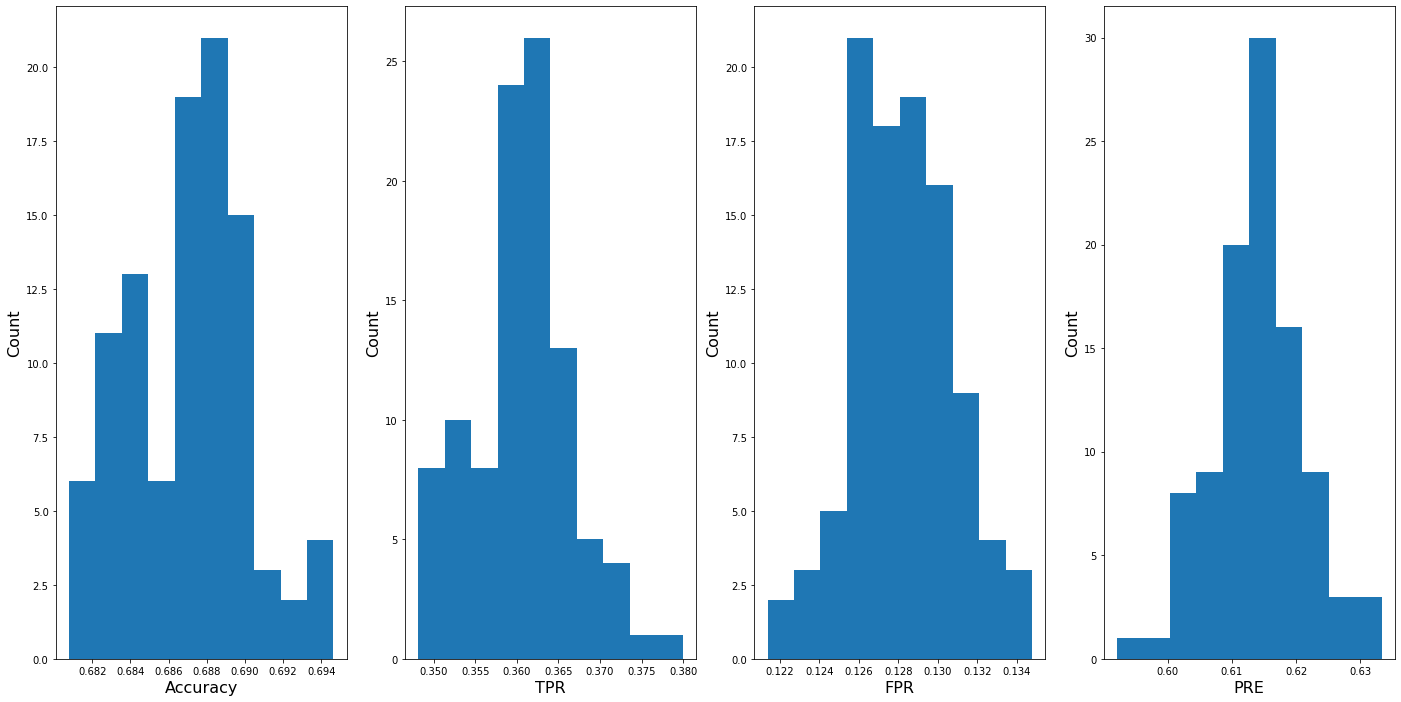

In [222]:
CI_acc = np.quantile(bs_output['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [223]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.681658,0.693676
TPR,0.349681,0.371109
FPR,0.123454,0.133389
PRE,0.600687,0.629229


# Bootstrap for Random Forest Classifier with CV - DepDelay15

In [210]:
bs_output2 = bootstrap_validation_rf(x_test, y_test_delay15, rf_cv_depDelay15.best_estimator_)

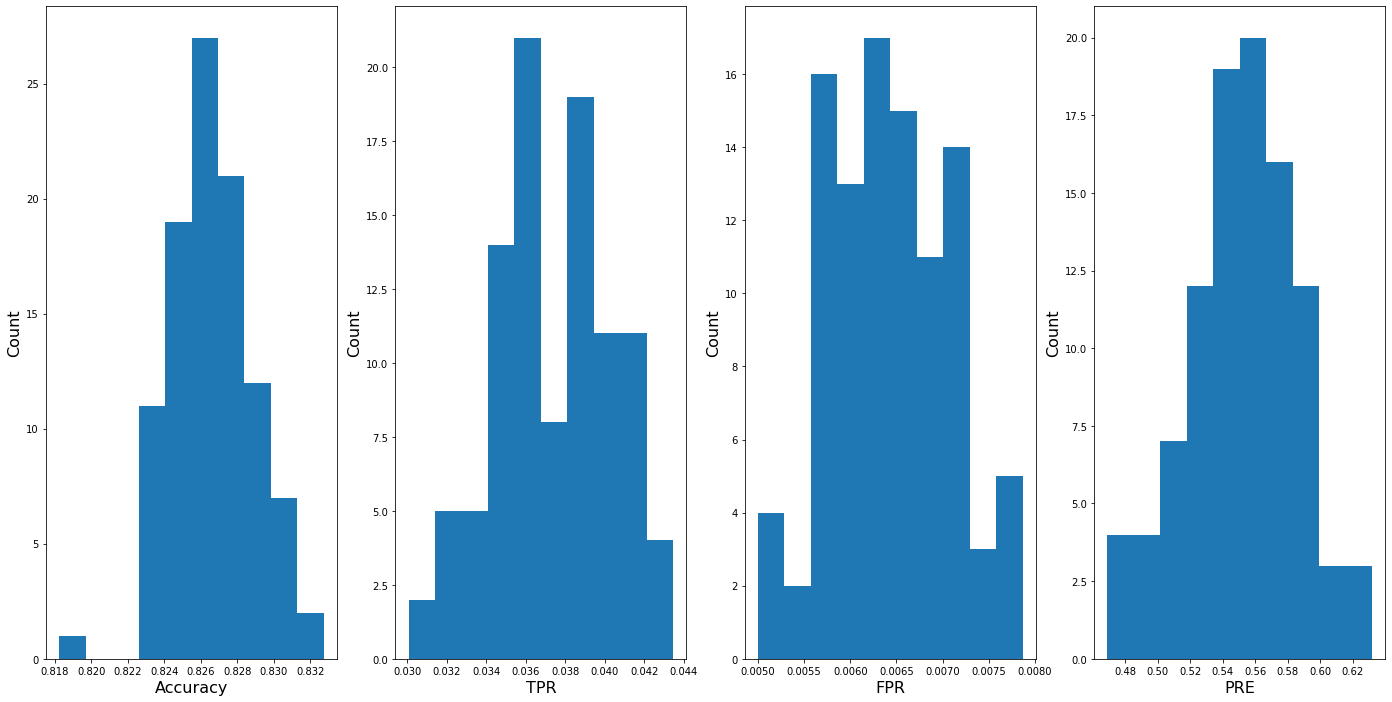

In [211]:
CI_acc = np.quantile(bs_output2['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output2['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output2['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output2['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output2.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [212]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.822954,0.830928
TPR,0.031603,0.043277
FPR,0.005245,0.007681
PRE,0.476972,0.612958
